<h2> Leveraging Machine Learning Models to Predict Heart Attack Risk</h2>
<b> Ben Wynia </b>

The leading cause of death globally is cardiovascular disease, with heart attacks being a significant contributor. In the
United States alone, approximately 805,000 people experience a heart attack each year, and about 1 in 4 deaths is due to
heart disease. This highlights the importance of early detection and prediction of heart attack risk to prevent fatalities and
improve overall cardiovascular health. 

Machine learning has emerged as a valuable tool in predicting and diagnosing
various diseases, including cardiovascular disease. By leveraging large datasets and advanced algorithms, machine
learning models can identify patterns and predict outcomes with high accuracy. In the context of heart attack risk
prediction, machine learning can analyze a wide range of variables, including demographic information, medical history,
lifestyle factors, and clinical measurements. 

This project aims to develop a binary classification model that predicts an
individual's heart attack risk based on common measures of cardiovascular health, including blood pressure, cholesterol
levels, and body mass index. The model's objective is to accurately classify individuals as either low or high risk, allowing
for early intervention and prevention. The potential impact of this project is significant, as accurate heart attack risk
prediction can save lives, reduce healthcare costs, and improve overall health outcomes.

<h2> Section 1: Import Libraries </h2>

In [1]:
# Base python libraries
import datetime
import os
import logging
import time
import os
import openai
import json
import pandas as pd
import requests
import json
import re
import copy
import math
from dataclasses import dataclass

# Pandas!
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Numerical Python!
import numpy as np

# Scientific Python!
from scipy.stats import jarque_bera

# sklearn libraries
import sklearn.tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import sklearn.ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Visualization Libraries
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical models 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Image processing
from IPython.display import Image
from io import BytesIO

# PDF processing
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors, units
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image,  Table, TableStyle, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER, TA_JUSTIFY
import markdown2
from reportlab.platypus import Paragraph as ReportLabParagraph
from reportlab.lib.styles import ParagraphStyle as ReportLabParagraphStyle
from html import escape
from xml.sax.saxutils import unescape

# Other/random
import itertools
from functools import partial
import pickle

# Suppress
import warnings

# suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# import proprietary functions
pd.options.mode.chained_assignment = None
from lib import descriptives
from lib import data_cleanup
from lib import histograms
from lib import corr_map
from lib import train_test_validate
from lib import hyperparameters
from lib import analyze_classification_model
from lib import model_pdf_report

<h2> Section 2: Import Datasets </h2>

In [39]:
current_directory = os.getcwd()
data_dictionary = pd.read_csv(f"{current_directory}/data/data_dictionary.csv")
data_dictionary.columns = ['Name', 'Definition']
df = pd.read_csv(f"{current_directory}/data/heart.csv", low_memory=False)

The measures in this dataset are important for assessing
cardiovascular disease risk. Age, sex, and cholesterol are well-known risk factors for heart disease. High resting blood
pressure, exercise-induced angina, and chest pain can also indicate heart disease. The number of major vessels can
indicate the severity of heart disease. The maximum heart rate achieved and previous peak can indicate the patient's
cardiovascular fitness. The thal rate is a measure of blood flow to the heart muscle, which is important in assessing heart
disease risk. The target variable is the most important measure, as it indicates the presence or absence of heart disease.
Before conducting analysis on this dataset, we performed some preprocessing steps. First, we checked for missing values
and found that the dataset was already clean. Second, we performed feature engineering by creating dummy variables for
categorical variables such as sex and chest pain type. Third, we checked for outliers and found none that required further
action. Overall, the dataset was ready for analysis.

In [40]:
data_dictionary

,Name,Definition
0,age,Age of the patient
1,sex,Sex of the patient
2,exng,exercise induced angina (1 = yes; 0 = no)
3,caa,number of major vessels (0-3)
4,cp,Chest Pain type chest pain type\nValue 1: typi...
5,trtbps,resting blood pressure (in mm Hg)
6,chol,cholestoral in mg/dl fetched via BMI sensor
7,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
8,restecg,resting electrocardiographic results\nValue 0:...
9,thalachh,maximum heart rate achieved


<h2> Section 3. Data Cleanup and Exploratory Data Analysis</h2>

In [4]:
data_cleanup.get_dataframe_shape(df)

The dataset has 14 columns and 303 rows


<h3> Descriptive Statistics </h3>
<b>Function: Descriptive Statistics </b>

This function takes a Pandas dataframe as input and computes various descriptive statistics of the variables. If the variable is numeric, it calculates the count, missing values, mean, median, mode, range, variance, standard deviation, skewness, kurtosis, minimum, maximum, and interquartile range. If the variable is not numeric, it calculates the frequency distribution, relative frequency, and mode.

<b>Parameters:</b>
df: Pandas DataFrame
Input data frame containing variables for which descriptive statistics are to be computed.

<b>Output:</b>
A Pandas DataFrame containing descriptive statistics for each variable in the input data frame.

<b> Required Libraries:</b>
pandas

<b>Example Usage:</b>

import pandas as pd
df = pd.DataFrame({'var1': [1,2,3,4,5], 'var2': ['a','b','c','d','e'], 'var3': [1.1,2.2,3.3,4.4,5.5]})
descriptive_statistics(df)

<b> Note: </b> The function assumes that the input dataframe is cleaned and has no missing values except for NaNs.

<b> Note on Data Types</b>
The function checks whether a variable is numeric or not based on its data type. It assumes that variables of type "int64" and "float64" are numeric and all other variables are not numeric. If you have variables that are numeric but have data types other than "int64" or "float64", you can modify the code to include those data types.

In [5]:
descriptives.descriptive_statistics(df)

,count,missing_values,data_type,mean,median,mode,range,variance,std_dev,skewness,kurtosis,min,max,IQR
age,303,0,int64,54.366337,55.0,58.0,48.0,82.484558,9.082101,-0.202463,-0.542167,29.0,77.0,13.5
sex,303,0,int64,0.683168,1.0,1.0,1.0,0.217166,0.466011,-0.791335,-1.382961,0.0,1.0,1.0
cp,303,0,int64,0.966997,1.0,0.0,3.0,1.065132,1.032052,0.484732,-1.193071,0.0,3.0,2.0
trtbps,303,0,int64,131.623762,130.0,120.0,106.0,307.586453,17.538143,0.713768,0.929054,94.0,200.0,20.0
chol,303,0,int64,246.264026,240.0,197.0,438.0,2686.426748,51.830751,1.143401,4.505423,126.0,564.0,63.5
fbs,303,0,int64,0.148515,0.0,0.0,1.0,0.126877,0.356198,1.986652,1.959678,0.0,1.0,0.0
restecg,303,0,int64,0.528053,1.0,1.0,2.0,0.276528,0.525860,0.162522,-1.362673,0.0,2.0,1.0
thalachh,303,0,int64,149.646865,153.0,162.0,131.0,524.646406,22.905161,-0.537410,-0.061970,71.0,202.0,32.5
exng,303,0,int64,0.326733,0.0,0.0,1.0,0.220707,0.469794,0.742532,-1.458317,0.0,1.0,1.0
oldpeak,303,0,float64,1.039604,0.8,0.0,6.2,1.348095,1.161075,1.269720,1.575813,0.0,6.2,1.6


<h3>Variable Histograms</h3>
<b>Function: Create Histogram</b>

This function creates a matrix of histograms for all numeric columns of the input dataframe. It calculates the optimal set of rows and columns for the histogram matrix based on the number of numeric columns in the dataframe. It uses the Seaborn library to plot histograms of each numeric variable in the dataframe.

<b>Parameters:</b>

df: Pandas DataFrame
Input data frame containing numeric variables for which histograms are to be plotted.
figsize: tuple, default=(15, 15)
The figure size of the histogram matrix.
bins: int, default=20
The number of bins to use for the histogram.
color: str, default='steelblue'
The color of the bars in the histogram.
<b>Output:</b>

Displays a matrix of histograms for all numeric columns of the input dataframe.
<b>Required Libraries:</b>

numpy
matplotlib.pyplot
seaborn
<p> <b>Example Usage:</b> </p>

python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({'var1': [1,2,3,4,5], 'var2': [2,4,6,8,10], 'var3': [3,6,9,12,15], 'var4': [4,8,12,16,20]})
create_histogram(df)

<b> Note: </b> The function assumes that the input dataframe only contains numeric columns.

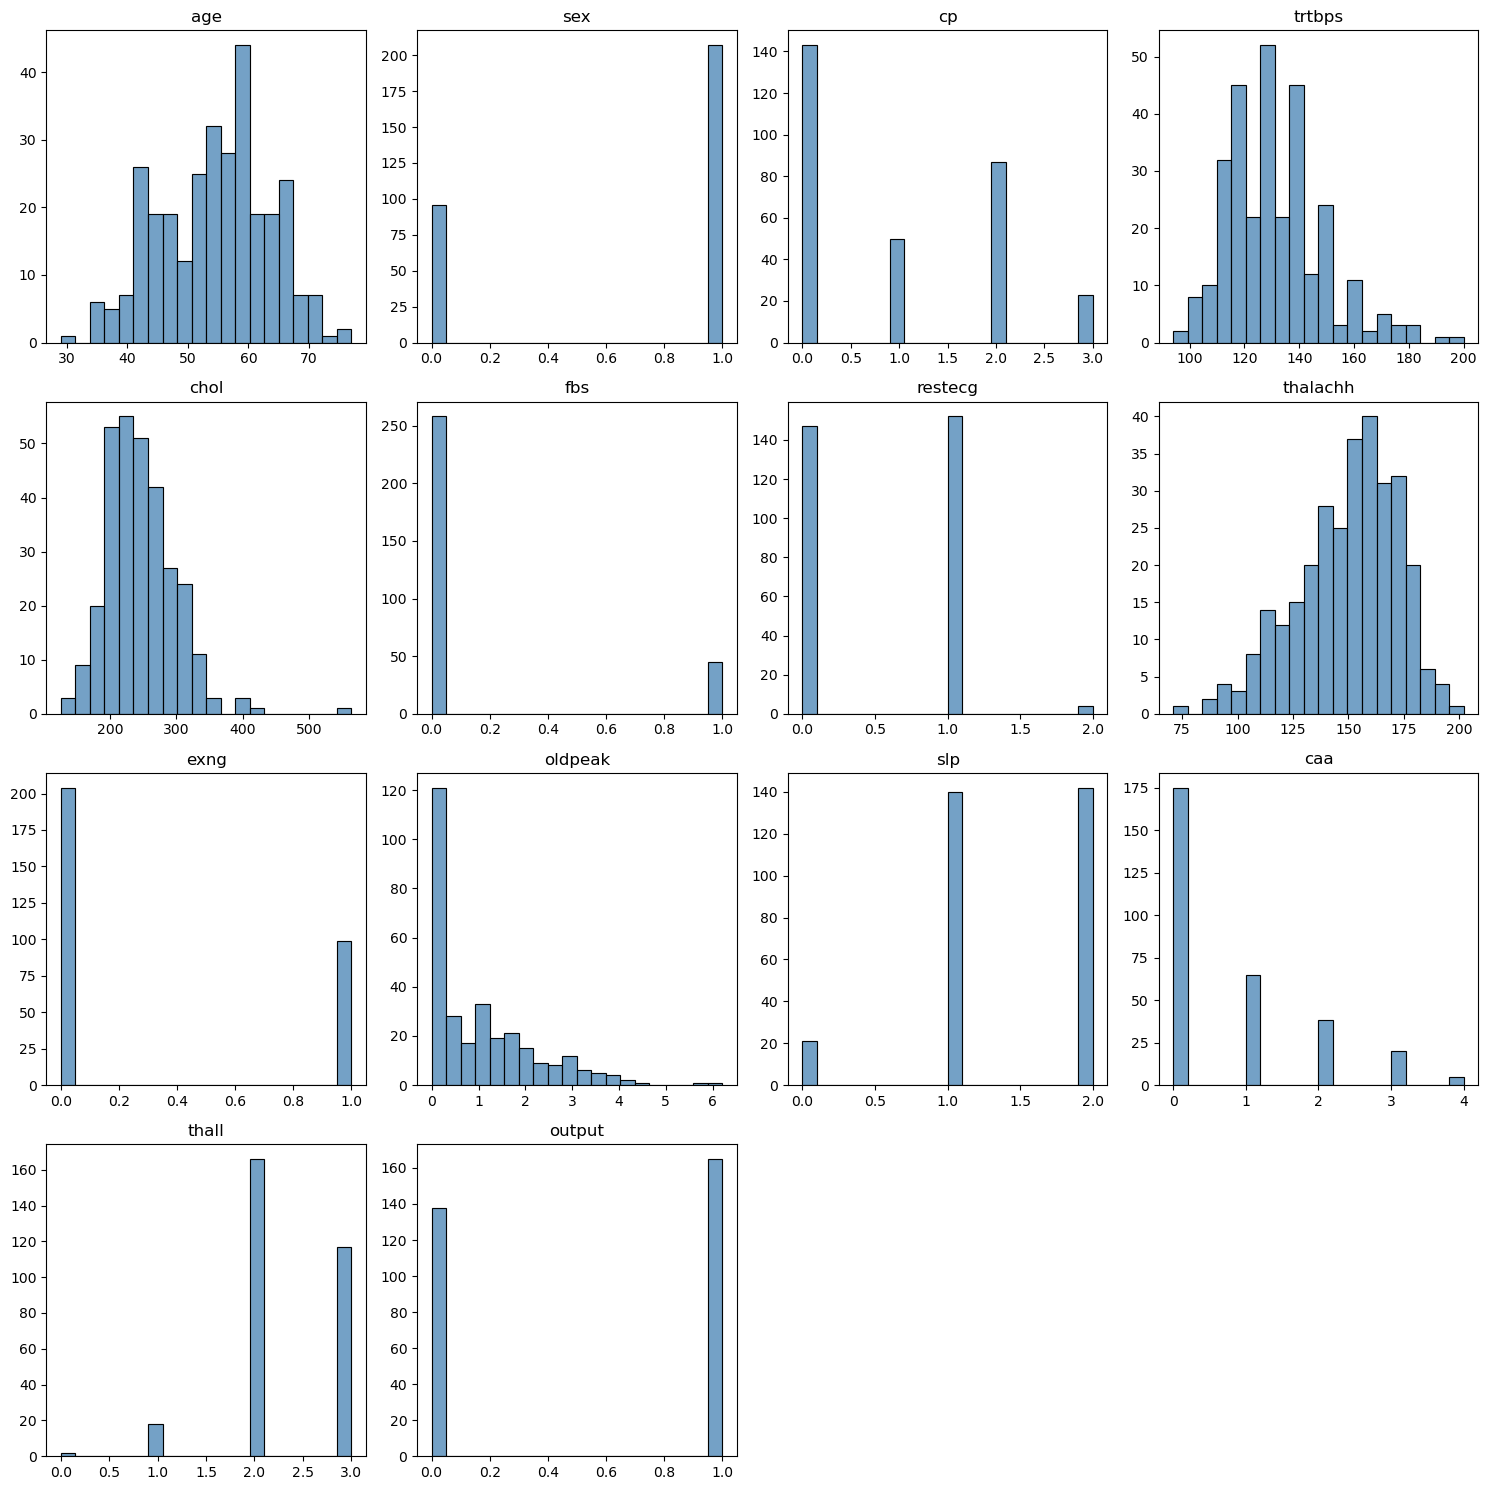

In [6]:
histograms.create_histogram(df)

<h3> Correlation Heatmap </h3>
    
<b>Function: Correlation Heatmap </b>
This function computes and visualizes pairwise correlation matrix of numeric variables in a Pandas dataframe using Spearman's rank correlation method. It drops variables that have too few samples or zero variance before computing the correlation matrix. It creates a heatmap of the correlation matrix using Seaborn library and saves the plot as an image file.

<b>Parameters:</b>
df: Pandas DataFrame
Input data frame containing numeric variables for which correlation heatmap is to be plotted.
Output:
A heatmap of pairwise correlations between numeric variables in the input data frame.

<b> Required Libraries:</b>
numpy
seaborn
pingouin
matplotlib.pyplot

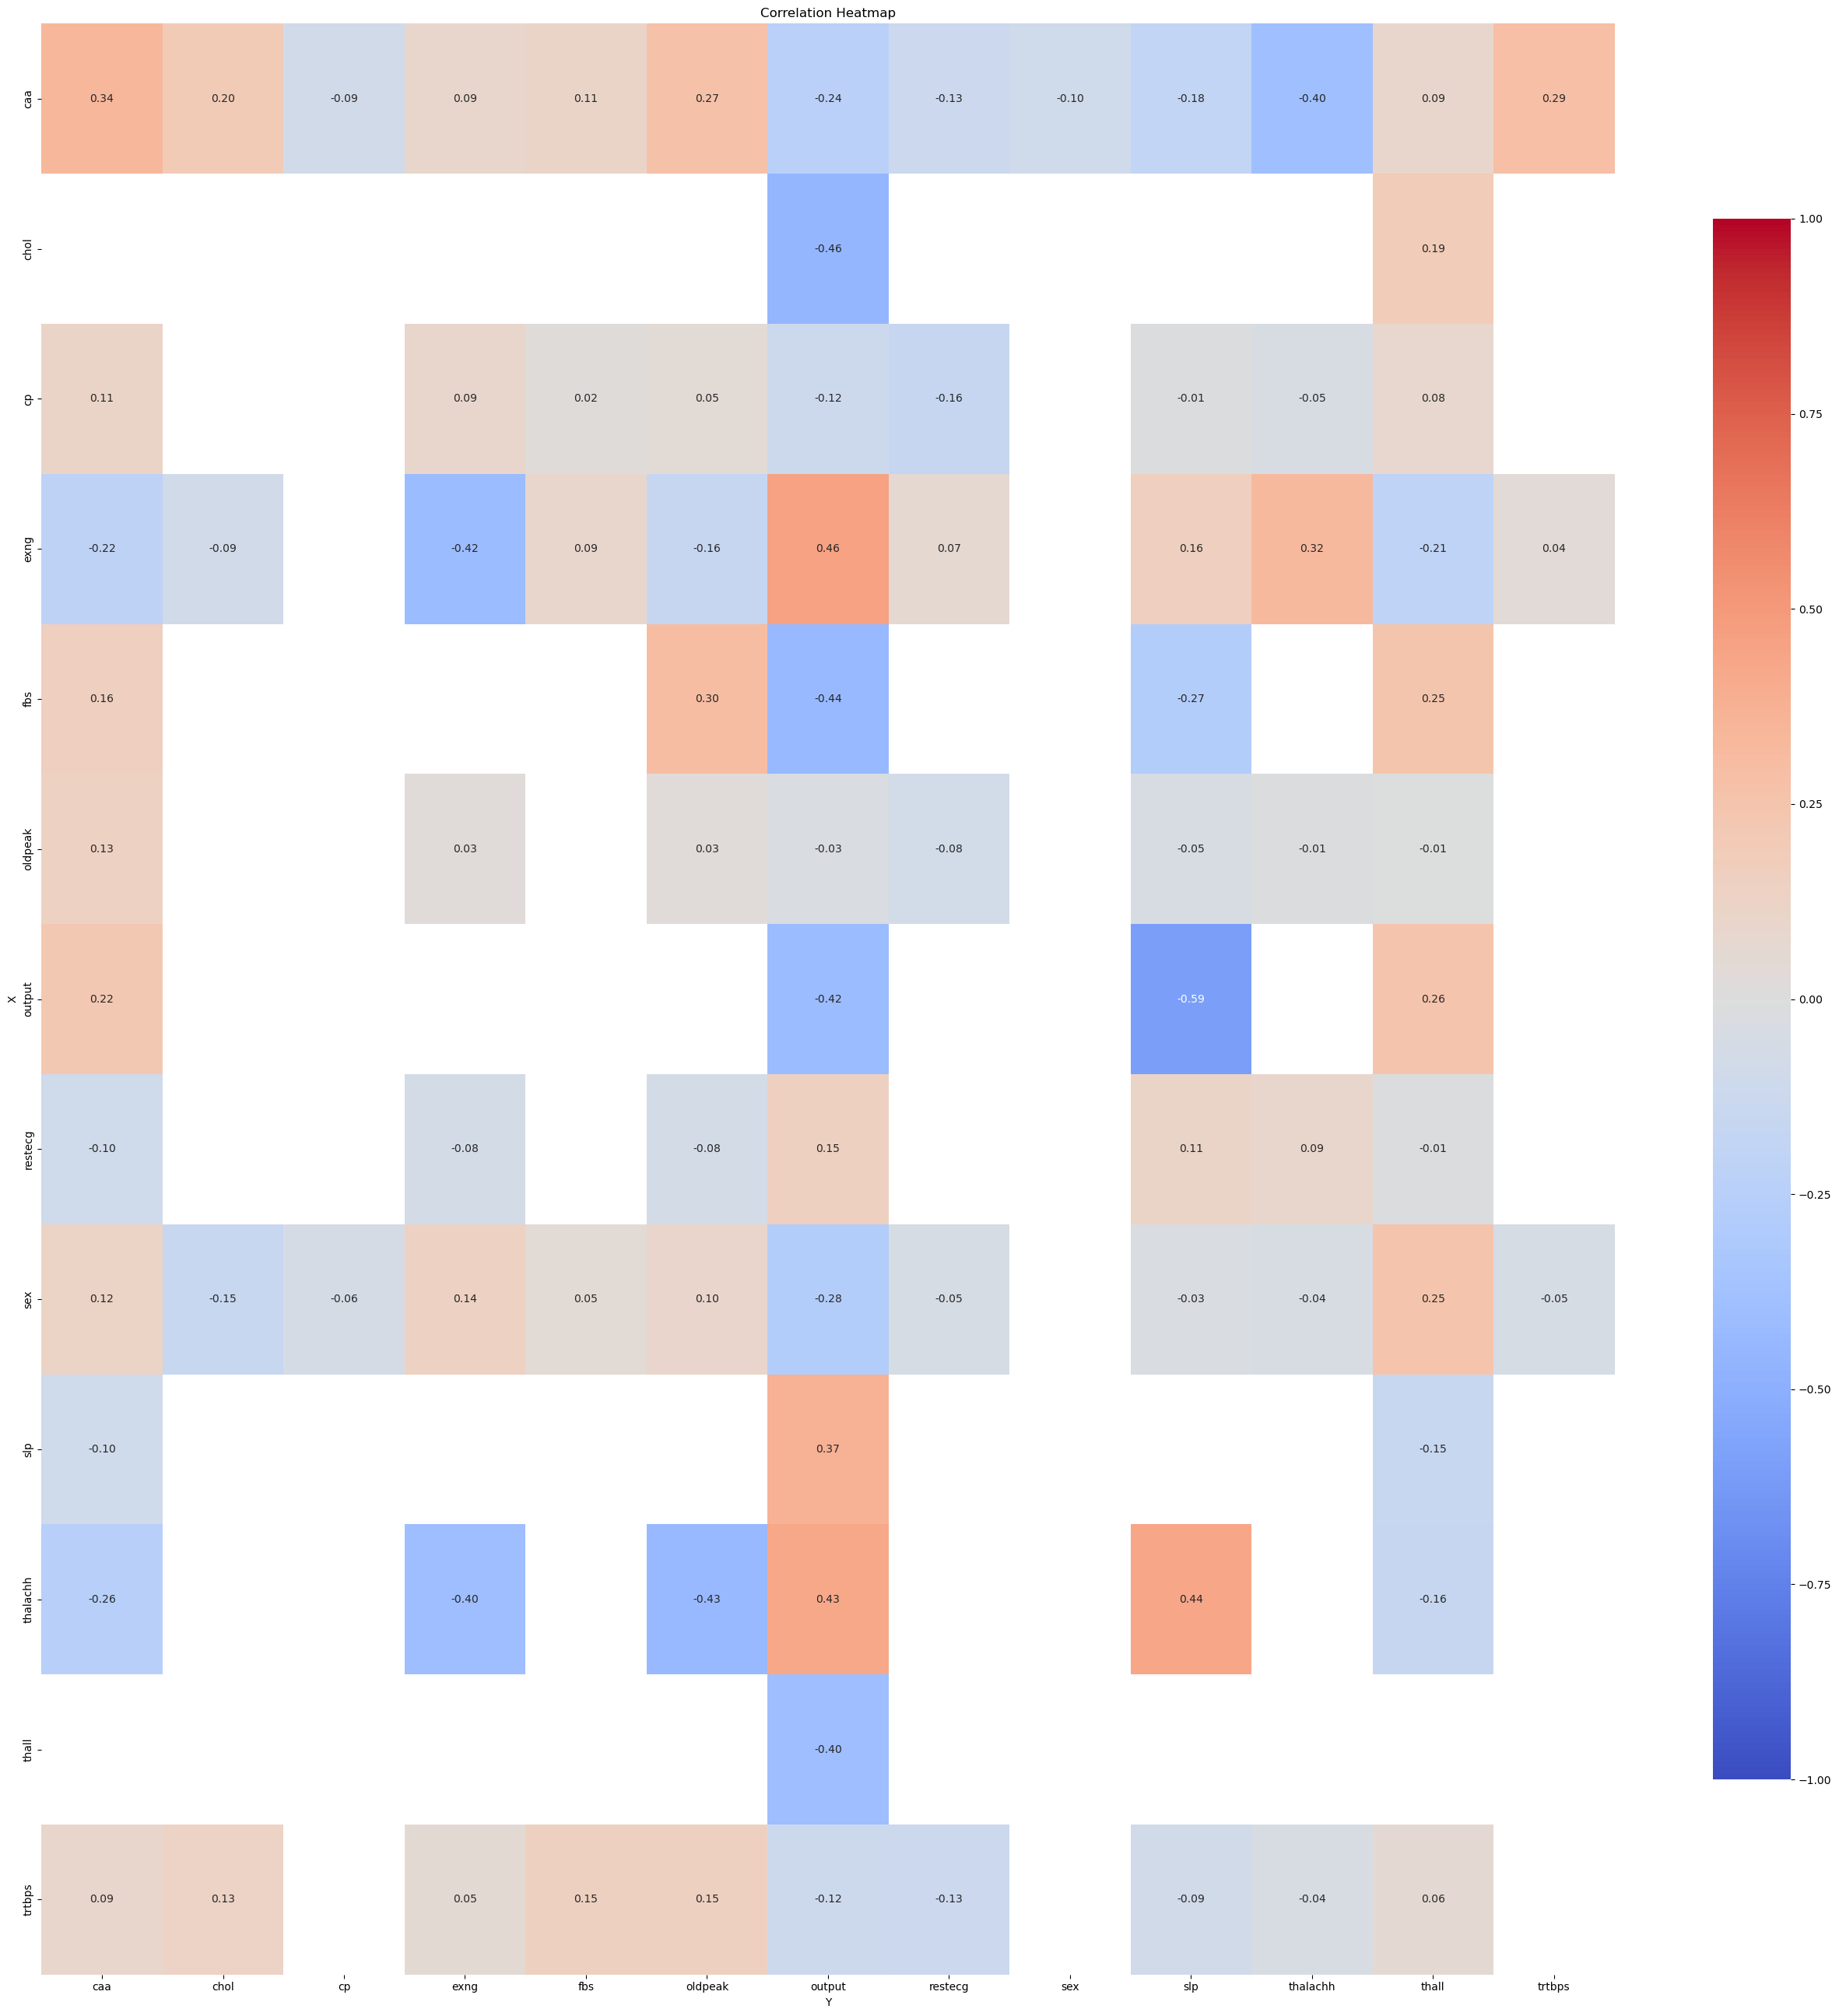

In [7]:
corr_map.correlation_heatmap(df)

<h3>Data Cleanup Functions</h3>
<b>Function 1: Select Columns</b>

This function processes a dataframe and retains only the selected columns. It returns a new dataframe containing only the selected columns.

<b>Parameters:</b>

df: Pandas DataFrame
Input data frame from which columns are to be retained.
columns_to_keep: list
List of column names to be retained in the input data frame.
<b>Output:</b>

A new data frame containing only the selected columns.
<p></p>
<b>Function 2: Get Dataframe Shape</b>

This function provides information about the size and shape of the input dataframe.

<b>Parameters:</b>

df: Pandas DataFrame
Input data frame for which information is to be provided.
<b>Output:</b>

A string describing the shape of the input dataframe.
<p></p>
<b>Function 3: Clean Up Missing Data</b>

This function drops any columns from the input dataframe that are missing too many data points based on a breakpoint provided by the user. It returns a new data frame with the columns with too many missing values removed.

<b>Parameters:</b>

df: Pandas DataFrame
Input data frame from which columns with too many missing values are to be removed.
breakpoint: float
The breakpoint for the minimum data completeness required for each column.
<b>Output:</b>

A tuple containing the nan_percentages by variable and the resulting data frame with the columns with too many missing values removed.
<p></p>
<b>Function 4: Drop Rows with NA</b>

This function drops NA records from the input dataframe. It returns a new data frame without NA records.

<b>Parameters:</b>

df: Pandas DataFrame
Input data frame from which NA rows are to be removed.
<b>Output:</b>

A new data frame without NA records.
<p></p>
<b>Function 5: One-Hot Encode Categorical Variables</b>

This function creates a dummy binary variable for each level of the categorical variable in the input dataframe. Columns are named with the prefix of '1h_<original column name>', and the original variable is dropped from the input data frame.

<b>Parameters:</b>

<p> df: Pandas DataFrame -- Input data frame in which categorical variables are to be one-hot encoded.</p>
<p> col_list: List of column names of the categorical variables to be one-hot encoded.</p>
    
<b>Output:</b>

A new data frame with all variables in col_list recoded.

<p></p>
<b>Function 6: Run Data Cleanup Functions</b>

This function prunes the input dataframe to only keep the selected columns, removes columns with too many missing records, removes rows with missing values, recodes the categorical variables into dummies, prunes the data dictionary to retain only the variables use in the function, and prints the resulting data frame shape after each operation so you know how the data frame has changed.

<b>Parameters:</b>

df: Pandas DataFrame
<p>Input data frame for cleanup.</p>
<p>data_dictionary: Pandas DataFrame -- Data dictionary which has two columns "Name" and "Definition".</p>
<p>columns_to_keep: list -- List of column names to be retained in the input data frame.</p>
<p>columns_to_recode: list -- List of column names of the categorical variables to be one-hot encoded.</p>
<p>breakpoint: float --The breakpoint for the minimum data completeness required for each column.</p>
<b>Output:</b>

A tuple containing the resulting data frame and data dictionary.
<p><b>Required Libraries:</b></p>

pandas
numpy
matplotlib.pyplot
seaborn

Original dataframe---
The dataset has 14 columns and 303 rows


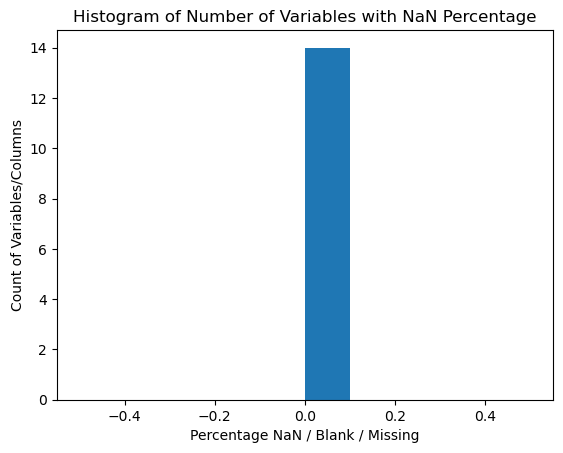

After cleaning up columns with missing data---
The dataset has 14 columns and 303 rows
Number of rows before filtering: 303
Number of rows after filtering: 303
Percentage of rows dropped: 0.0%
After cleaning up rows with missing data---
The dataset has 14 columns and 303 rows
After recoding categorical variables into one-hot variables---
The dataset has 31 columns and 303 rows


In [8]:
columns_to_keep=list(df.columns)
columns_to_recode=['sex','exng','cp','fbs','restecg','slp','caa','thall']
breakpoint=0.95
df, data_dictionary2 = data_cleanup.run_data_cleanup_functions(df, data_dictionary, columns_to_keep, columns_to_recode, breakpoint)

<b> Define the Dependent Variable </b> 

In [9]:
target = 'output'
target 

'output'

<b> Define the Independent Variables </b> 

In [10]:
features = [col for col in df.columns if col != target]
features

['age',
 'trtbps',
 'chol',
 'thalachh',
 'oldpeak',
 '1h_sex_0',
 '1h_sex_1',
 '1h_exng_0',
 '1h_exng_1',
 '1h_cp_0',
 '1h_cp_1',
 '1h_cp_2',
 '1h_cp_3',
 '1h_fbs_0',
 '1h_fbs_1',
 '1h_restecg_0',
 '1h_restecg_1',
 '1h_restecg_2',
 '1h_slp_0',
 '1h_slp_1',
 '1h_slp_2',
 '1h_caa_0',
 '1h_caa_1',
 '1h_caa_2',
 '1h_caa_3',
 '1h_caa_4',
 '1h_thall_0',
 '1h_thall_1',
 '1h_thall_2',
 '1h_thall_3']

In [11]:
df[target].value_counts()

1    165
0    138
Name: output, dtype: int64

<h3> View Independent Variable Correlations </h3>
<b>Function: View Independent Variable Correlations </b>

This function computes the Pearson correlation between the target variable and each independent variable in a Pandas dataframe, and returns the resulting correlation coefficients sorted in descending order.

<b>Parameters:</b>
data: Pandas DataFrame
Input data frame containing the target variable and independent variables to be used in the correlation analysis.

target_variable: str
Name of the target variable for which correlations with the independent variables are to be computed.

<b>Required Libraries:</b>
pandas

<b>Outputs:</b>
A Pandas series containing the correlation coefficients between the target variable and each independent variable, sorted in descending order.

In [12]:
def view_independent_variable_correlations(data, target_variable):
    correlations = data.corr(method='pearson')[target_variable].drop(target_variable)
    correlations = correlations.sort_values(ascending=False)
    return correlations

In [13]:
correlations = view_independent_variable_correlations(df, target)
correlations

1h_thall_2      0.527334
1h_caa_0        0.465590
1h_exng_0       0.436757
thalachh        0.421741
1h_slp_2        0.394066
1h_cp_2         0.316742
1h_sex_0        0.280937
1h_cp_1         0.245879
1h_restecg_1    0.175322
1h_cp_3         0.086957
1h_caa_4        0.066441
1h_fbs_0        0.028046
1h_thall_0     -0.007293
1h_fbs_1       -0.028046
1h_slp_0       -0.063554
1h_restecg_2   -0.068410
chol           -0.085239
1h_thall_1     -0.106589
trtbps         -0.144931
1h_restecg_0   -0.159775
1h_caa_3       -0.210615
age            -0.225439
1h_caa_1       -0.232412
1h_caa_2       -0.273998
1h_sex_1       -0.280937
1h_slp_1       -0.362053
oldpeak        -0.430696
1h_exng_1      -0.436757
1h_thall_3     -0.486112
1h_cp_0        -0.516015
Name: output, dtype: float64

<h3> Compute Class Weights </h3>
<b>Function: Compute Class Weights </b>

This function computes the class weights for a binary classification problem. It takes a Pandas dataframe and calculates the proportion of samples in each class, then assigns a weight of 1 to the minority class and a weight proportional to the class imbalance to the majority class.

<b>Parameters:</b>
df: Pandas DataFrame
Input data frame containing the target variable for which class weights are to be computed.

<b>Outputs:</b>
A dictionary containing the class weights for the binary classification problem. The keys are the class labels (0 and 1) and the values are the corresponding weights.

<b>Example Usage:</b>
distribution = df['output'].value_counts()
low_weight = distribution[1]/distribution[0]
class_weights = compute_class_weights(df)
print(class_weights)

<b>Required Libraries:</b>
pandas

In [14]:
def compute_class_weights(df, target_variable):

    # Count the number of samples in each class
    distribution = df[target_variable].value_counts()

    # Compute the weight of the minority class relative to the majority class
    low_weight = distribution[1] / distribution[0]

    # Assign weights to each class
    class_weights = {0: low_weight, 1: 1}
    
    print(f"The distribution of the dependent variable is: {distribution}")
    print(f"The resuling class weights are: {class_weights}")

    return class_weights, distribution

In [15]:
class_weights, distribution = compute_class_weights(df, target)

The distribution of the dependent variable is: 1    165
0    138
Name: output, dtype: int64
The resuling class weights are: {0: 1.1956521739130435, 1: 1}


<h3> Split Data into Train/Validation/Test Sets</h3>
<b>Function: Split Data </b>
This function takes a pandas DataFrame and performs a split of the data into training, testing, and validation sets. It is designed for use with a dependent variable with a binary classification. It prints out the distribution of the dependent variable in each of the training, testing, and validation sets.

<b>Parameters:</b>
df: Pandas DataFrame
Input data frame containing all data to be split into training, testing, and validation sets.

labels: List of Strings
List of two strings used to identify the two possible values for the dependent variable.

target: String
String identifying the dependent variable in the input data frame.

Output:
Three Pandas DataFrames containing the training, testing, and validation sets.

<b> Required Libraries:</b>
pandas
sklearn.model_selection.train_test_split

In [16]:
labels = ['Low Heart Risk','High Heart Risk']
train_data, test_data, val_data = train_test_validate.split_data(df, labels, target)

Train data dependent distribution:
    86 (0 - Low Heart Risk) 95(1 - High Heart Risk)
Test data dependent distribution:
    24 (0 - Low Heart Risk) 37(1 - High Heart Risk)
Validation data dependent distribution:
    28 (0 - Low Heart Risk) 33(1 - High Heart Risk)


<h2> Section 4: Train Models to Optimize Hyperparameters </h2> 

<b> Create Directory to store trained models </b> 
<p>This code creates a directory called "models" in the current working directory if it does not exist. If the directory already exists, the code simply prints a message indicating that it already exists.</p>

In [17]:
import os

current_directory = os.getcwd()
directory_name = f"{current_directory}/models"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)
    print(f"{directory_name} created successfully!")
else:
    print(f"{directory_name} already exists.")

C:\Users\bwynia\heart_attack_risk_analysis/models already exists.


<b> General Function to check for trained model and retrain as necessary </b>

<h3> train_and_save_model </h3>
<b> Function: </b> trains a classifier, finds the best hyperparameters using cross-validation, and saves the trained model and hyperparameter results to files. If the model and results already exist, it loads them from files.

<b> Parameters: </b>

<ul>
<li> classifier: A function to build a classifier object. </li>
<li> param_grid: A dictionary containing the hyperparameters and their possible values. </li>
<li> method: A string indicating the tuning method. Either "GridSearchCV" or "RandomizedSearchCV". </li>
<li> features: A Pandas dataframe containing the independent variables. </li>
<li> target: A Pandas series containing the dependent variable. </li>
<li> model_file_path: A string indicating the path to save the trained model. </li>
<li> results_file_path: A string indicating the path to save the hyperparameter results. </li>
</ul>
<b> Outputs: </b>

<ul>
<li> trained_model: A scikit-learn estimator object that has been fit with the best hyperparameters. </li>
<li> best_params: A dictionary containing the best hyperparameters found by the tuning method. </li>
<li> best_score: A float indicating the mean cross-validated score achieved with the best hyperparameters. </li>
<li> elapsed_time: A float indicating the number of seconds taken to fit the best estimator on the whole dataset. </li>
</ul>

In [18]:
def train_and_save_model(classifier, param_grid, method, features, target, model_file_path, results_file_path):
    # Check if model and results already exist
    try:
        with open(model_file_path, "rb") as f:
            trained_model = pickle.load(f)
        with open(results_file_path, "rb") as f:
            best_params, best_score, elapsed_time = pickle.load(f)
        print("Loaded existing model and hyperparameter results.")
        print(best_params)
        print(best_score)
        
    except FileNotFoundError:
        # Build classifier
        clf = classifier()

        # Build parameter grid
        param_dist = param_grid

        # Define tuning method
        if method == "GridSearchCV":
            tuning_method = GridSearchCV(clf, param_dist, cv=5, n_jobs=-1, scoring='roc_auc')
        elif method == "RandomizedSearchCV":
            tuning_method = RandomizedSearchCV(clf, param_dist, cv=5, n_jobs=-1, scoring='roc_auc', n_iter=100)

        # Train classifier and find best hyperparameters
        tuning_method.fit(features, target)
        trained_model = tuning_method.best_estimator_
        best_params = tuning_method.best_params_
        best_score = tuning_method.best_score_
        elapsed_time = tuning_method.refit_time_

        # Save trained model and hyperparameter results to files
        with open(model_file_path, "wb") as f:
            pickle.dump(trained_model, f)
        with open(results_file_path, "wb") as f:
            pickle.dump((best_params, best_score, elapsed_time), f)
        print("Trained model and hyperparameter results saved to files.")
        print(best_params)
        print(best_score)
    
    return trained_model, best_params, best_score, elapsed_time

<b> Logistic Regression </b>

<h2>Logistic Regression Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training a logistic regression model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><code>penalty</code>: {'l1', 'l2', 'elasticnet', 'none'}
        <ul>
            <li><code>l1</code>: Lasso regularization</li>
            <li><code>l2</code>: Ridge regularization</li>
            <li><code>elasticnet</code>: Elastic Net regularization</li>
            <li><code>none</code>: No regularization</li>
        </ul>
    </li>
    <li><code>C</code>: float, default=1.0
        <ul>
            <li>Inverse of regularization strength; smaller values specify stronger regularization.</li>
        </ul>
    </li>
    <li><code>fit_intercept</code>: bool, default=True
        <ul>
            <li>Specifies whether or not to calculate the intercept for this model.</li>
        </ul>
    </li>
    <li><code>solver</code>: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
        <ul>
            <li>Algorithm to use in the optimization problem.</li>
        </ul>
    </li>
    <li><code>l1_ratio</code>: float, default=None
        <ul>
            <li>Only used if penalty='elasticnet'; specifies the mixing parameter for L1 and L2 regularization.</li>
        </ul>
    </li>
</ul>
<h2>Training a Logistic Regression Model</h2>
<p>The following code defines a logistic regression model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>logreg_model</code>: LogisticRegression object
        <ul>
            <li>Base logistic regression model to be tuned.</li>
        </ul>
    </li>
    <li><code>logreg_method</code>: {'GridSearchCV', 'RandomizedSearchCV'}
        <ul>
            <li>Method to use for hyperparameter tuning.</li>
        </ul>
    </li>
    <li><code>logreg_param_grid</code>: list of dicts
        <ul>
            <li>Hyperparameter grid to search.</li>
        </ul>
    </li>
    <li><code>train_data[features]</code>: pandas DataFrame
        <ul>
            <li>Features to use for training the model.</li>
        </ul>
    </li>
    <li><code>train_data[target]</code>: pandas Series
        <ul>
            <li>Target variable to predict.</li>
        </ul>
    </li>
</ul>

In [19]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/logreg_trained_model.pkl"
results_file_path = f"{directory_name}/logreg_hyperparameter_results.pkl"

# Define base model and tuning methodology
logreg_model = LogisticRegression(max_iter=10000, class_weight=class_weights)
logreg_method = "GridSearchCV" # "RandomizedSearchCV"

# Build parameter grid
logreg_param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['liblinear']
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['newton-cg', 'lbfgs', 'sag']
    },
    {
        'penalty': ['l2', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['saga']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    {
        'penalty': ['none'],
        'fit_intercept': [True, False],
        'solver': ['newton-cg', 'lbfgs', 'sag']
    }
]

# Train and save logistic regression model
logreg_trained_model, logreg_best_params, logreg_best_score, logreg_elapsed_time = train_and_save_model(logreg_model, 
                                                                                                         logreg_param_grid, 
                                                                                                         logreg_method, 
                                                                                                         train_data[features], 
                                                                                                         train_data[target], 
                                                                                                         model_file_path, 
                                                                                                         results_file_path)

Loaded existing model and hyperparameter results.
{'C': 1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
0.8454954954954955


<h2>AdaBoost Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training an AdaBoost classifier model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><code>base_estimator</code>: DecisionTreeClassifier object or list of DecisionTreeClassifier objects
        <ul>
            <li>Base estimator(s) from which the boosted ensemble is built. The decision tree(s) can be either a single decision tree or a list of decision trees with different depths.</li>
        </ul>
    </li>
    <li><code>n_estimators</code>: int
        <ul>
            <li>The maximum number of estimators at which boosting is terminated. Too large a value can lead to overfitting.</li>
        </ul>
    </li>
    <li><code>learning_rate</code>: float
        <ul>
            <li>The contribution of each classifier in the final combination is multiplied by this learning rate. Smaller values require more estimators to reach the same level of accuracy as larger values.</li>
        </ul>
    </li>
    <li><code>algorithm</code>: {'SAMME', 'SAMME.R'}
        <ul>
            <li>The boosting algorithm to use. 'SAMME' stands for Stagewise Additive Modeling using a Multiclass Exponential loss function, while 'SAMME.R' stands for SAMME.R for Real. SAMME.R is a variant of SAMME that relies on class probabilities rather than class labels and generally performs better.</li>
        </ul>
    </li>
    <li><code>random_state</code>: int or RandomState
        <ul>
            <li>Seed for random number generator to ensure reproducibility of results.</li>
        </ul>
    </li>
</ul>
<h2>Training an AdaBoost Classifier Model</h2>
<p>The following code defines an AdaBoost classifier model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>abc_trained_model</code>: AdaBoostClassifier object
        <ul>
            <li>Base AdaBoost classifier model to be tuned.</li>
        </ul>
    </li>
    <li><code>abc_method</code>: {'GridSearchCV', 'RandomizedSearchCV'}
        <ul>
            <li>Method to use for hyperparameter tuning.</li>
        </ul>
    </li>
    <li><code>abc_param_grid</code>: dict
        <ul>
            <li>Hyperparameter grid to search.</li>
        </ul>
    </li>
    <li><code>train_data[features]</code>: pandas DataFrame
        <ul>
            <li>Features to use for training the model.</li>
        </ul>
    </li>
    <li><code>train_data[target]</code>: pandas Series
        <ul>
            <li>Target variable to predict.</li>
        </ul>
    </li>
</ul>

In [20]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/abc_trained_model.pkl"
results_file_path = f"{directory_name}/abc_hyperparameter_results.pkl"

# Define tuning methodology
abc_method = "GridSearchCV"

# Build parameter grid
abc_param_grid = {
    'base_estimator': [DecisionTreeClassifier(class_weight=class_weights, max_depth=d) for d in [1, 2, 3]],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1, 2],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [7]
}

# Train and save AdaBoost classifier model
abc_trained_model, abc_best_params, abc_best_score, abc_elapsed_time = train_and_save_model(sklearn.ensemble.AdaBoostClassifier, 
                                                                                            abc_param_grid, 
                                                                                            abc_method, 
                                                                                            train_data[features], 
                                                                                            train_data[target], 
                                                                                            model_file_path, 
                                                                                            results_file_path)

Loaded existing model and hyperparameter results.
{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(class_weight={0: 1.1956521739130435, 1: 1}, max_depth=1), 'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 7}
0.9347781217750258


<h2>Decision Tree Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training a decision tree classifier model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><code>criterion</code>: {'gini', 'entropy'}
        <ul>
            <li>The function to measure the quality of a split. 'gini' uses the Gini impurity, while 'entropy' uses the information gain.</li>
        </ul>
    </li>
    <li><code>splitter</code>: {'best', 'random'}
        <ul>
            <li>The strategy used to choose the split at each node. 'best' chooses the best split, while 'random' chooses the best random split.</li>
        </ul>
    </li>
    <li><code>max_depth</code>: int or None
        <ul>
            <li>The maximum depth of the tree. A larger value generally leads to overfitting, while a smaller value can lead to underfitting. If None, the nodes are expanded until all the leaves contain less than min_samples_split samples.</li>
        </ul>
    </li>
    <li><code>min_samples_split</code>: int or float
        <ul>
            <li>The minimum number of samples required to split an internal node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.</li>
        </ul>
    </li>
    <li><code>min_samples_leaf</code>: int or float
        <ul>
            <li>The minimum number of samples required to be at a leaf node. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.</li>
        </ul>
    </li>
    <li><code>max_features</code>: {'auto', 'sqrt', 'log2'} or None
        <ul>
            <li>The number of features to consider when looking for the best split. If None, then all features are considered. 'auto' chooses sqrt(n_features) features, while 'sqrt' and 'log2' choose sqrt(n_features) and log2(n_features) features, respectively.</li>
        </ul>
    </li>
    <li><code>class_weight</code>: dict, 'balanced', or None
        <ul>
            <li>Weights associated with classes. If None, all classes are supposed to have weight one. 'balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies, while a dictionary assigns weight to each class. It is also possible to pass class_weights calculated externally to the model as a parameter.</li>
        </ul>
    </li>
</ul>
<h2>Training a Decision Tree Classifier Model</h2>
<p>The following code defines a decision tree classifier model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>dt_trained

In [21]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/dt_trained_model.pkl"
results_file_path = f"{directory_name}/dt_hyperparameter_results.pkl"

# Define base model and tuning methodology
dt_method = "GridSearchCV"

# Build parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced',class_weights]
}

# Train and save decision tree classifier model
dt_trained_model, dt_best_params, dt_best_score, dt_elapsed_time = train_and_save_model(DecisionTreeClassifier, 
                                                                                        dt_param_grid, 
                                                                                        dt_method, 
                                                                                        train_data[features], 
                                                                                        train_data[target], 
                                                                                        model_file_path, 
                                                                                        results_file_path)

Loaded existing model and hyperparameter results.
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
0.8999484004127967


<h2>Random Forest Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training a random forest classifier model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><strong>General Parameters</strong>
        <ul>
            <li><code>n_estimators</code>: int
                <ul>
                    <li>The number of trees in the forest.</li>
                </ul>
            </li>
            <li><code>criterion</code>: {'gini', 'entropy'}
                <ul>
                    <li>The function to measure the quality of a split. 'gini' uses the Gini impurity, while 'entropy' uses the information gain.</li>
                </ul>
            </li>
            <li><code>max_depth</code>: int or None
                <ul>
                    <li>The maximum depth of the tree. A larger value generally leads to overfitting, while a smaller value can lead to underfitting. If None, the nodes are expanded until all the leaves contain less than min_samples_split samples.</li>
                </ul>
            </li>
            <li><code>min_samples_split</code>: int or float
                <ul>
                    <li>The minimum number of samples required to split an internal node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.</li>
                </ul>
            </li>
            <li><code>min_samples_leaf</code>: int or float
                <ul>
                    <li>The minimum number of samples required to be at a leaf node. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.</li>
                </ul>
            </li>
            <li><code>max_features</code>: {'auto', 'sqrt', 'log2'} or None
                <ul>
                    <li>The number of features to consider when looking for the best split. If None, then all features are considered. 'auto' chooses sqrt(n_features) features, while 'sqrt' and 'log2' choose sqrt(n_features) and log2(n_features) features, respectively.</li>
                </ul>
            </li>
            <li><code>class_weight</code>: dict, 'balanced', 'balanced_subsample', or None
                <ul>
                    <li>Weights associated with classes. If None, all classes are supposed to have weight one. 'balanced' uses the values of y to automatically adjust weights inversely proportional to class frequencies, while 'balanced_subsample' is the same as 'balanced' but computed on a per-tree basis. A dictionary assigns weight to each class. It is also possible to pass class_weights calculated externally to the model as a parameter.</li>
                </ul>
            </li>
            <li><code>n_jobs</code>: int or None
                <ul>
                    <li>The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.</li>
                </ul>
            </li>
            <li><code>random_state</code>: int or RandomState
                <ul>
                    <li>Seed for random number generator to ensure reproducibility of results.</li>
                </ul>
            </li>
        </ul>
    </li>
    <li><strong>Bootstrap Sampling Parameters</strong>
    <li><code>bootstrap</code>: bool
            <ul>
                <li>Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.</li>
            </ul>
        </li>
        <li><code>oob_score</code>: bool
            <ul>
                <li>Whether to use out-of-bag samples to estimate the generalization accuracy. If True, then the score of each tree is computed using samples that are not used for training that tree.</li>
            </ul>
        </li>
    </ul>
</li>

In [22]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/rfc_trained_model.pkl"
results_file_path = f"{directory_name}/rfc_hyperparameter_results.pkl"

# Define base model and tuning methodology
rfc_method = "RandomizedSearchCV"

# Build parameter grid
rfc_param_grid = [
    {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True],
        'class_weight': [None, 'balanced', 'balanced_subsample', class_weights],
        'oob_score': [False, True],
        'n_jobs': [-1],
        'random_state': [42]
    },
    {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [False],
        'class_weight': [None, 'balanced', 'balanced_subsample', class_weights],
        'n_jobs': [-1],
        'random_state': [42]
    }
]

# Train and save random forest classifier model
rfc_trained_model, rfc_best_params, rfc_best_score, rfc_elapsed_time = train_and_save_model(sklearn.ensemble.RandomForestClassifier, 
                                                                                            rfc_param_grid, 
                                                                                            rfc_method, 
                                                                                            train_data[features], 
                                                                                            train_data[target], 
                                                                                            model_file_path, 
                                                                                            results_file_path)

Loaded existing model and hyperparameter results.
{'random_state': 42, 'oob_score': False, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
0.9344341245270037


<h2>K-Nearest Neighbors (KNN) Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training a KNN model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><code>n_neighbors</code>: int
        <ul>
            <li>Number of neighbors to use.</li>
        </ul>
    </li>
    <li><code>weights</code>: {'uniform', 'distance'}
        <ul>
            <li>Weight function used in prediction. 'uniform' weights all points in the neighborhood equally, while 'distance' weights points by the inverse of their distance.</li>
        </ul>
    </li>
    <li><code>algorithm</code>: {'auto', 'ball_tree', 'kd_tree', 'brute'}
        <ul>
            <li>Algorithm used to compute the nearest neighbors.</li>
        </ul>
    </li>
    <li><code>leaf_size</code>: int
        <ul>
            <li>Leaf size passed to BallTree or KDTree.</li>
        </ul>
    </li>
    <li><code>p</code>: int
        <ul>
            <li>Power parameter for the Minkowski metric. When p=1, this is equivalent to using the Manhattan distance, and when p=2, it is equivalent to using the Euclidean distance.</li>
        </ul>
    </li>
    <li><code>metric</code>: {'euclidean', 'manhattan', 'minkowski'}
        <ul>
            <li>Distance metric to use for the tree.</li>
        </ul>
    </li>
    <li><code>n_jobs</code>: int
        <ul>
            <li>Number of CPU cores to use for the computation.</li>
        </ul>
    </li>
</ul>
<h2>Training a KNN Classifier Model</h2>
<p>The following code defines a KNN classifier model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>knn_model</code>: KNeighborsClassifier object
        <ul>
            <li>Base KNN classifier model to be tuned.</li>
        </ul>
    </li>
    <li><code>knn_method</code>: {'GridSearchCV', 'RandomizedSearchCV'}
        <ul>
            <li>Method to use for hyperparameter tuning.</li>
        </ul>
    </li>
    <li><code>knn_param_grid</code>: dict
        <ul>
            <li>Hyperparameter grid to search.</li>
        </ul>
    </li>
    <li><code>train_data[features]</code>: pandas DataFrame
        <ul>
            <li>Features to use for training the model.</li>
        </ul>
    </li>
    <li><code>train_data[target]</code>: pandas Series
        <ul>
            <li>Target variable to predict.</li>
        </ul>
    </li>
</ul> 

In [23]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/knn_trained_model.pkl"
results_file_path = f"{directory_name}/knn_hyperparameter_results.pkl"

# Define base model and tuning methodology
knn_method = "RandomizedSearchCV"

# Build parameter grid
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_jobs': [-1]
}

# Train and save KNN classifier model
knn_trained_model, knn_best_params, knn_best_score, knn_elapsed_time = train_and_save_model(KNeighborsClassifier, 
                                                                                            knn_param_grid, 
                                                                                            knn_method, 
                                                                                            train_data[features], 
                                                                                            train_data[target], 
                                                                                            model_file_path, 
                                                                                            results_file_path)

Loaded existing model and hyperparameter results.
{'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'n_jobs': -1, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'auto'}
0.6866185070519436


<h2>MLP Classifier Hyperparameter Grid</h2>
<p>The following hyperparameter grid is used for training an MLP classifier model with GridSearchCV or RandomizedSearchCV.</p>
<ul>
    <li><code>hidden_layer_sizes</code>: tuple, default=(100,)
        <ul>
            <li>The ith element represents the number of neurons in the ith hidden layer.</li>
        </ul>
    </li>
    <li><code>activation</code>: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        <ul>
            <li>Activation function for the hidden layer.</li>
        </ul>
    </li>
    <li><code>solver</code>: {'lbfgs', 'sgd', 'adam'}, default='adam'
        <ul>
            <li>Algorithm to use in the optimization problem.</li>
        </ul>
    </li>
    <li><code>alpha</code>: float, default=0.0001
        <ul>
            <li>L2 penalty (regularization term) parameter.</li>
        </ul>
    </li>
    <li><code>batch_size</code>: int, default='auto'
        <ul>
            <li>Size of minibatches for stochastic optimizers.</li>
        </ul>
    </li>
    <li><code>learning_rate</code>: {'constant', 'invscaling', 'adaptive'}, default='constant'
        <ul>
            <li>Learning rate schedule for weight updates.</li>
        </ul>
    </li>
    <li><code>learning_rate_init</code>: float, default=0.001
        <ul>
            <li>The initial learning rate used.</li>
        </ul>
    </li>
    <li><code>power_t</code>: float, default=0.5
        <ul>
            <li>Exponent for inverse scaling learning rate.</li>
        </ul>
    </li>
    <li><code>max_iter</code>: int, default=200
        <ul>
            <li>Maximum number of iterations.</li>
        </ul>
    </li>
    <li><code>shuffle</code>: bool, default=True
        <ul>
            <li>Whether to shuffle samples in each iteration.</li>
        </ul>
    </li>
    <li><code>random_state</code>: int, default=42
        <ul>
            <li>Seed used by the random number generator.</li>
        </ul>
    </li>
    <li><code>tol</code>: float, default=1e-4
        <ul>
            <li>Tolerance for optimization.</li>
        </ul>
    </li>
    <li><code>verbose</code>: bool, default=False
        <ul>
            <li>Whether to print progress messages to stdout.</li>
        </ul>
    </li>
    <li><code>warm_start</code>: bool, default=False
        <ul>
            <li>When set to True, reuse the solution of the previous call to fit as initialization.</li>
        </ul>
    </li>
    <li><code>momentum</code>: float, default=0.9
        <ul>
            <li>Momentum for SGD optimizer.</li>
        </ul>
    </li>
    <li><code>nesterovs_momentum</code>: bool, default=True
        <ul>
            <li>Whether to use Nesterov's momentum. Only used when <code>solver='sgd'</code>.</li>
        </ul>
    </li>
    <li><code>early_stopping</code>: bool, default=False
        <ul>
            <li>Whether to use early stopping to terminate training when validation score doesn't improve. If set to True, also requires setting aside some validation data.</li>
        </ul>
    </li>
    <li><code>validation_fraction</code>: float, default=0.1
        <ul>
            <li>The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1.</li>
        </ul>
    </li>
    <li><code>beta_1</code>: float, default=0.9
        <ul>
            <li>The exponential decay rate for estimating the first moment vector in Adam. Only used when <code>solver='adam'</code> or <code>solver='adamax'</code>.</li>
        </ul>
    </li>
    <li><code>beta_2</code>: float, default=0.999
        <ul>
            <li>The exponential decay rate for estimating the second moment vector in Adam. Only used when <code>solver='adam'</code> or <code>solver='adamax'</code>.</li>
        </ul>
    </li>
    <li><code>epsilon</code>: float, default=1e-8
        <ul>
            <li>Value to avoid division by zero. Only used when <code>solver='adam'</code> or <code>solver='adamax'</code>.</li>
        </ul>
    </li>
    <li><code>n_iter_no_change</code>: int, default=10
        <ul>
            <li>Maximum number of iterations with no improvement to wait before stopping optimization. Only used when <code>early_stopping=True</code>.</li>
        </ul>
    </li>
    <li><code>class_weight</code>: dict, 'balanced', or None, default=None
        <ul>
            <li>Weights associated with classes in the form <code>{class_label: weight}</code>. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y. If set to 'balanced', class weights will be inversely proportional to the number of samples in each class. Only used for <code>solver='sgd'</code> or <code>solver='adam'</code>.</li>
        </ul>
    </li>
</ul>

In [24]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/mlp_trained_model.pkl"
results_file_path = f"{directory_name}/mlp_hyperparameter_results.pkl"

# Define tuning methodology
mlp_method = "RandomizedSearchCV"

# Build parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': ['auto', 50, 100, 200],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'power_t': [0.5, 0.75],
    'max_iter': [200, 500, 1000],
    'shuffle': [True, False],
    'random_state': [42],
    'tol': [1e-4, 1e-5],
    'verbose': [False],
    'warm_start': [False, True],
    'momentum': [0.9, 0.95],
    'nesterovs_momentum': [True, False],
    'early_stopping': [False, True],
    'validation_fraction': [0.1, 0.2],
    'beta_1': [0.9, 0.95],
    'beta_2': [0.999, 0.99],
    'epsilon': [1e-8, 1e-9],
    'n_iter_no_change': [10, 20],
    'class_weight': ['balanced', class_weights]
}

# Train and save MLP classifier model
mlp_trained_model, mlp_best_params, mlp_best_score, mlp_elapsed_time = train_and_save_model(MLPClassifier, 
                                                                                            mlp_param_grid, 
                                                                                            mlp_method, 
                                                                                            train_data[features], 
                                                                                            train_data[target], 
                                                                                            model_file_path, 
                                                                                            results_file_path)

Loaded existing model and hyperparameter results.
{'warm_start': True, 'verbose': False, 'validation_fraction': 0.2, 'tol': 0.0001, 'solver': 'adam', 'shuffle': False, 'random_state': 42, 'power_t': 0.75, 'nesterovs_momentum': True, 'n_iter_no_change': 20, 'momentum': 0.95, 'max_iter': 1000, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'epsilon': 1e-09, 'early_stopping': True, 'beta_2': 0.99, 'beta_1': 0.95, 'batch_size': 100, 'alpha': 0.01, 'activation': 'identity'}
0.9229446164430684


<h2>Training an SVM Model</h2>
<p>The following code defines an SVM model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>svm_model</code>: SVC object
        <ul>
    <li><code>svm_method</code>: {'GridSearchCV', 'RandomizedSearchCV'}
        <ul>
            <li>Method to use for hyperparameter tuning.</li>
        </ul>
    </li>
    <li><code>svm_param_grid</code>: list of dicts
        <ul>
            <li>Hyperparameter grid to search.</li>
            <li><code>C</code>: float, default=1.0
                <ul>
                    <li>Penalty parameter of the error term.</li>
                </ul>
            </li>
            <li><code>kernel</code>: {'linear', 'poly', 'rbf', 'sigmoid'}, default='rbf'
                <ul>
                    <li>Kernel function used in the algorithm.</li>
                </ul>
            </li>
            <li><code>degree</code>: int, default=3
                <ul>
                    <li>Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.</li>
                </ul>
            </li>
            <li><code>gamma</code>: {'scale', 'auto'} or float, default='scale'
                <ul>
                    <li>Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.</li>
                </ul>
            </li>
            <li><code>coef0</code>: float, default=0.0
                <ul>
                    <li>Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.</li>
                </ul>
            </li>
            <li><code>shrinking</code>: bool, default=True
                <ul>
                    <li>Whether to use the shrinking heuristic.</li>
                </ul>
            </li>
            <li><code>probability</code>: bool, default=False
                <ul>
                    <li>Whether to enable probability estimates.</li>
                </ul>
            </li>
            <li><code>tol</code>: float, default=1e-3
                <ul>
                    <li>Tolerance for stopping criterion.</li>
                </ul>
            </li>
            <li><code>class_weight</code>: {dict, 'balanced', None}, default=None
                <ul>
                    <li>Weights associated with classes. If not given, all classes are supposed to have weight one.</li>
                </ul>
            </li>
            <li><code>verbose</code>: bool, default=False
                <ul>
                    <li>Enable verbose output.</li>
                </ul>
            </li>
            <li><code>decision_function_shape</code>: {'ovr', 'ovo'}, default='ovr'
                <ul>
                    <li>Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one ('ovo') decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2).</li>
                </ul>
            </li>
        </ul>
    </li>
    <li><code>train_data[features]</code>: pandas DataFrame
        <ul>
            <li>Features to use for training the model.</li>
        </ul>
    </li>
    <li><code>train_data[target]</code>: pandas Series
        <ul>
            <li>Target variable to predict.</li>
        </ul>
    </li>
</ul>

In [25]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/svm_trained_model.pkl"
results_file_path = f"{directory_name}/svm_hyperparameter_results.pkl"

# Define tuning methodology
svm_method = "RandomizedSearchCV"

# Build parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # only applicable for 'poly' kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # only applicable for 'rbf', 'poly', 'sigmoid' kernels
    'coef0': [0, 1, 2],  # only applicable for 'poly' and 'sigmoid' kernels
    'shrinking': [True, False],
    'probability': [True],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced',class_weights],
    'verbose': [False],
    'decision_function_shape': ['ovr', 'ovo']
}

# Train and save SVM classifier model
svm_trained_model, svm_best_params, svm_best_score, svm_elapsed_time = train_and_save_model(SVC, 
                                                                                            svm_param_grid, 
                                                                                            svm_method, 
                                                                                            train_data[features], 
                                                                                            train_data[target], 
                                                                                            model_file_path, 
                                                                                            results_file_path)


Loaded existing model and hyperparameter results.
{'verbose': False, 'tol': 0.001, 'shrinking': False, 'probability': True, 'kernel': 'linear', 'gamma': 10, 'degree': 3, 'decision_function_shape': 'ovr', 'coef0': 2, 'class_weight': 'balanced', 'C': 0.1}
0.919642242862057


<h2>Training a Gradient Boosting Model</h2>
<p>The following code defines a Gradient Boosting model and hyperparameter grid, and then trains and saves the model using the <code>train_and_save_model</code> function.</p>
<ul>
    <li><code>model_file_path</code>: str
        <ul>
            <li>File path for saving/loading the trained model.</li>
        </ul>
    </li>
    <li><code>results_file_path</code>: str
        <ul>
            <li>File path for saving/loading the hyperparameter tuning results.</li>
        </ul>
    </li>
    <li><code>gbm_model</code>: GradientBoostingClassifier object
        <ul>
    <li><code>gbm_method</code>: {'GridSearchCV', 'RandomizedSearchCV'}
        <ul>
            <li>Method to use for hyperparameter tuning.</li>
        </ul>
    </li>
    <li><code>gbm_param_grid</code>: list of dicts
        <ul>
            <li>Hyperparameter grid to search.</li>
            <li><code>loss</code>: {'deviance', 'exponential'}, default='deviance'
                <ul>
                    <li>Loss function to be optimized.</li>
                </ul>
            </li>
            <li><code>learning_rate</code>: float, default=0.1
                <ul>
                    <li>Learning rate shrinks the contribution of each tree.</li>
                </ul>
            </li>
            <li><code>n_estimators</code>: int, default=100
                <ul>
                    <li>The number of boosting stages to perform.</li>
                </ul>
            </li>
            <li><code>subsample</code>: float, default=1.0
                <ul>
                    <li>The fraction of samples to be used for fitting the individual base learners.</li>
                </ul>
            </li>
            <li><code>criterion</code>: {'friedman_mse', 'mse', 'mae'}, default='friedman_mse'
                <ul>
                    <li>The function to measure the quality of a split.</li>
                </ul>
            </li>
            <li><code>min_samples_split</code>: int or float, default=2
                <ul>
                    <li>The minimum number of samples required to split an internal node.</li>
                </ul>
            </li>
            <li><code>min_samples_leaf</code>: int or float, default=1
                <ul>
                    <li>The minimum number of samples required to be at a leaf node.</li>
                </ul>
            </li>
            <li><code>max_depth</code>: int, default=3
                <ul>
                    <li>The maximum depth of the individual regression estimators.</li>
                </ul>
            </li>
            <li><code>max_features</code>: {'auto', 'sqrt', 'log2'}, default=None
                <ul>
                    <li>The number of features to consider when looking for the best split.</li>
                </ul>
            </li>
            <li><code>random_state</code>: int, RandomState instance or None, default=None
                <ul>
                    <li>Controls the randomness of the estimator.</li>
                </ul>
            </li>
            <ul>
    <li><code>verbose</code>: int, default=0
        <ul>
            <li>Controls the verbosity when fitting and predicting.</li>
        </ul>
    </li>
    <li><code>validation_fraction</code>: float, default=0.1
        <ul>
            <li>The proportion of the training data to set aside for validation, to be used for early stopping.</li>
        </ul>
    </li>
    <li><code>n_iter_no_change</code>: int or None, default=None
        <ul>
            <li>Number of iterations with no improvement to wait before stopping.</li>
        </ul>
    </li>
    <li><code>tol</code>: float, default=1e-4
        <ul>
            <li>Tolerance for the early stopping criterion.</li>
        </ul>
    </li>
    <li><code>ccp_alpha</code>: non-negative float, default=0.0
        <ul>
            <li>Complexity parameter used for Minimal Cost-Complexity Pruning.</li>
        </ul>
    </li>
</ul>

In [26]:
# Define file paths for saving/loading the model and its results
model_file_path = f"{directory_name}/gbm_trained_model.pkl"
results_file_path = f"{directory_name}/gbm_hyperparameter_results.pkl"

# Define tuning methodology
gbm_method = "RandomizedSearchCV"

# Parameter grid for Gradient Boosting Machines (GBM)
gbm_param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [10, 50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_depth': [3, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'verbose': [0],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [None, 5, 10],
    'tol': [1e-4, 1e-3],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Train and save Gradient Boosting classifier model
gbm_trained_model, gbm_best_params, gbm_best_score, gbm_elapsed_time = train_and_save_model(
    GradientBoostingClassifier, 
    gbm_param_grid, 
    gbm_method, 
    train_data[features], 
    train_data[target], 
    model_file_path, 
    results_file_path)

Loaded existing model and hyperparameter results.
{'verbose': 0, 'validation_fraction': 0.2, 'tol': 0.001, 'subsample': 0.8, 'random_state': 42, 'n_iter_no_change': None, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse', 'ccp_alpha': 0.0}
0.9286549707602338


<h2> Section 5: Model Evaluation </h2> 

<b> Global Model Variables </b>

In [27]:
# Initialize a dataframe to store the results
results_frame = pd.DataFrame(columns=['Model Name', 
                                      'Confusion Matrix',
                                      'Accuracy',
                                      'Precision',
                                      'Recall',
                                      'Specificity',
                                      'F1 Score',
                                      'Youden J Stat',
                                      'Optimal P Threshold'])

# Bundle datasets for model training and evaluation
datasets = [train_data, test_data, features, target]

# Define class_names
class_names = ["Low Heart Risk (0)", "High Heart Risk (1)"]

<b> Logistic Regression </b>

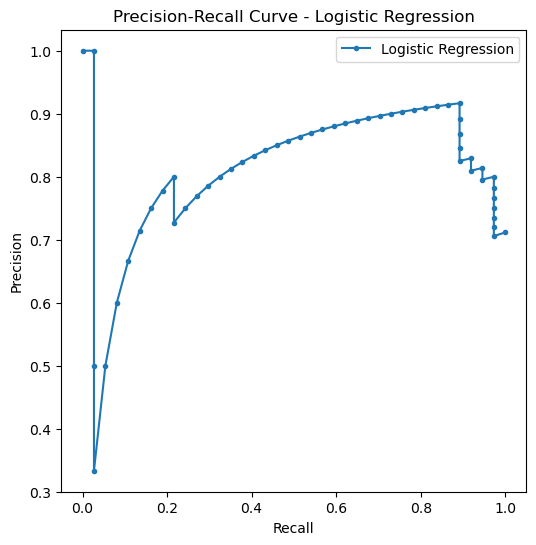

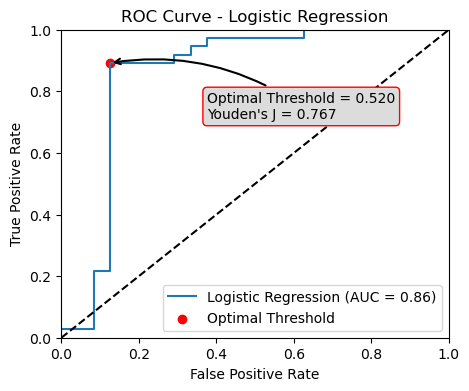

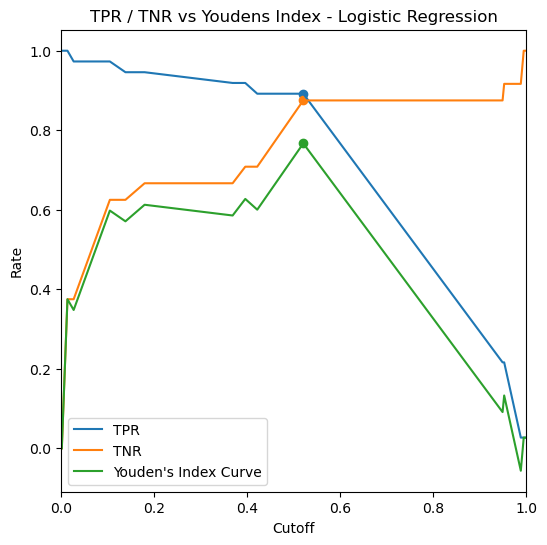

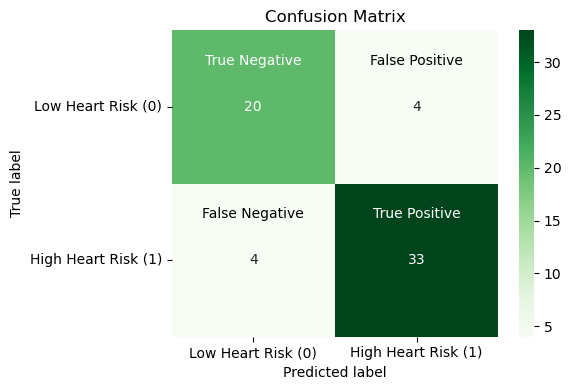

In [28]:
logreg_model_name, logreg_pr_curve_plot, logreg_roc_curve_plot, logreg_tpr_tnr_plot, logreg_conf_matrix, logreg_conf_matrix_plot, logreg_results = analyze_classification_model.analyze_model(logreg_trained_model,
                              'Logistic Regression',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(logreg_model_name, logreg_pr_curve_plot, logreg_roc_curve_plot, logreg_tpr_tnr_plot, logreg_conf_matrix_plot, logreg_results, logreg_best_params)
results_frame = results_frame.append(logreg_results, ignore_index=True)

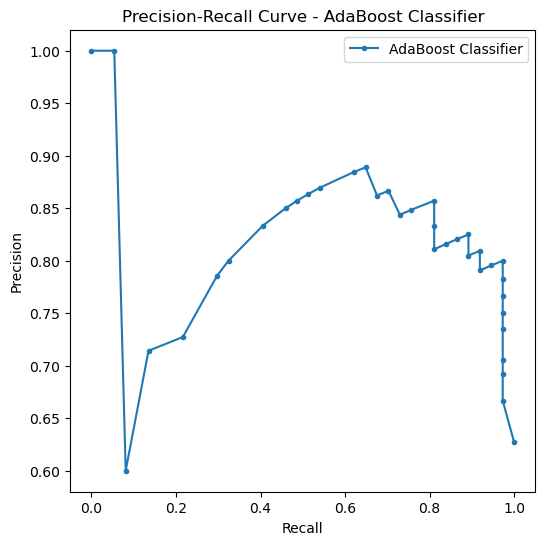

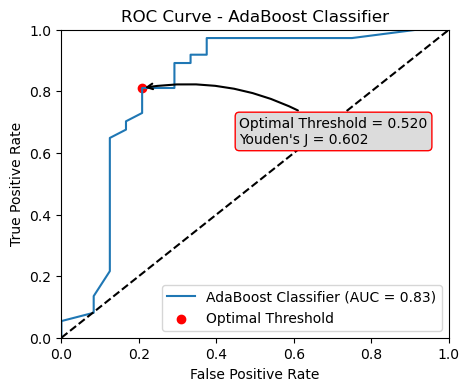

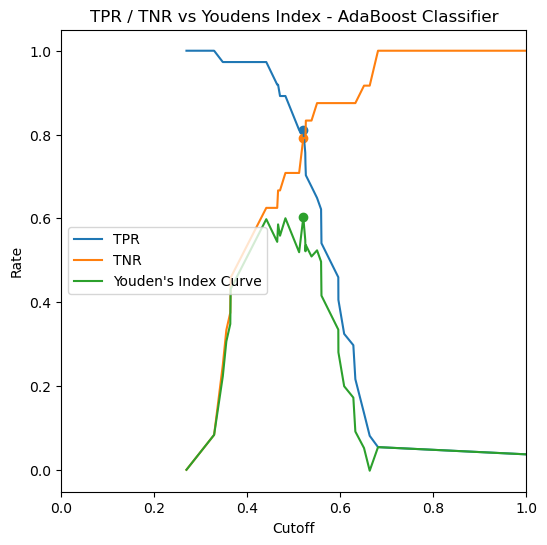

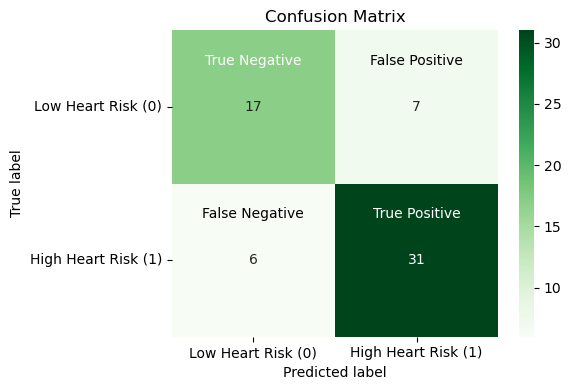

In [29]:
abc_model_name, abc_pr_curve_plot, abc_roc_curve_plot, abc_tpr_tnr_plot, abc_conf_matrix, abc_conf_matrix_plot, abc_results = analyze_classification_model.analyze_model(abc_trained_model,
                              'AdaBoost Classifier',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(abc_model_name, abc_pr_curve_plot, abc_roc_curve_plot, abc_tpr_tnr_plot, abc_conf_matrix_plot, abc_results, abc_best_params)
results_frame = results_frame.append(abc_results, ignore_index=True)

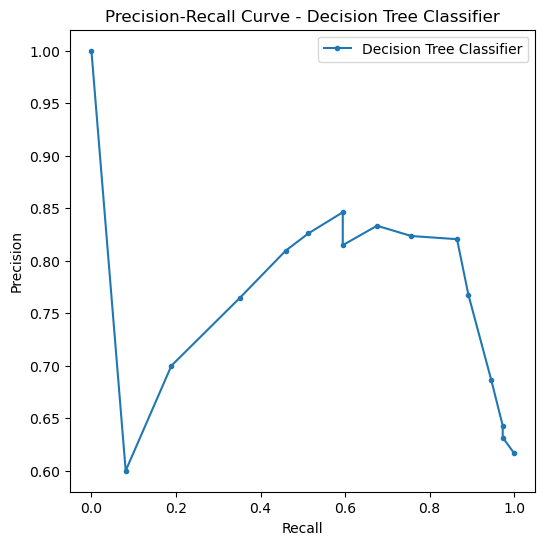

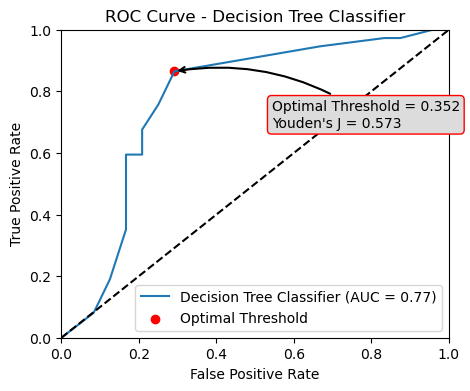

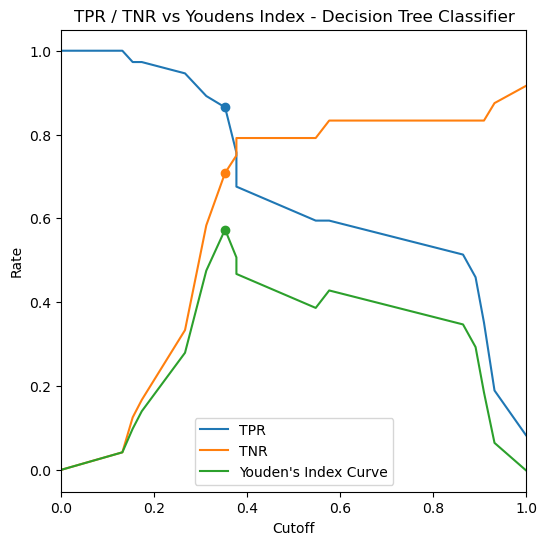

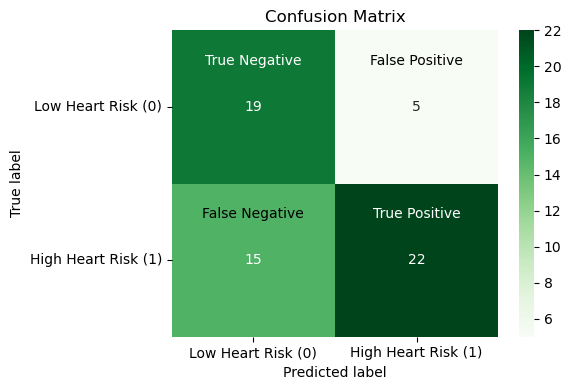

In [30]:
dt_model_name, dt_pr_curve_plot, dt_roc_curve_plot, dt_tpr_tnr_plot, dt_conf_matrix, dt_conf_matrix_plot, dt_results = analyze_classification_model.analyze_model(dt_trained_model,
                              'Decision Tree Classifier',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(dt_model_name, dt_pr_curve_plot, dt_roc_curve_plot, dt_tpr_tnr_plot, dt_conf_matrix_plot, dt_results, dt_best_params)
results_frame = results_frame.append(dt_results, ignore_index=True)


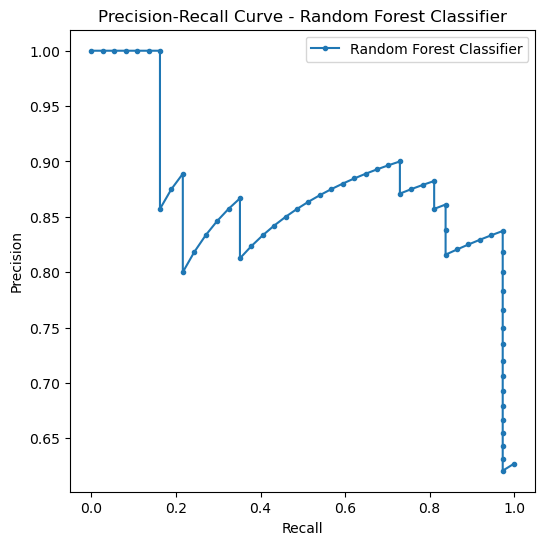

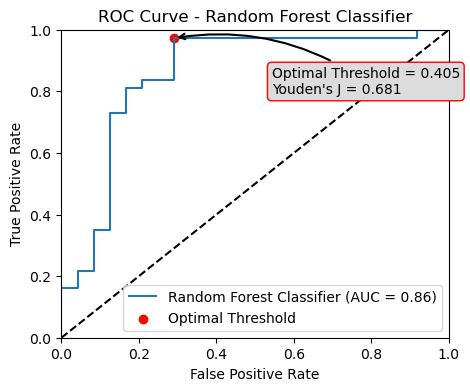

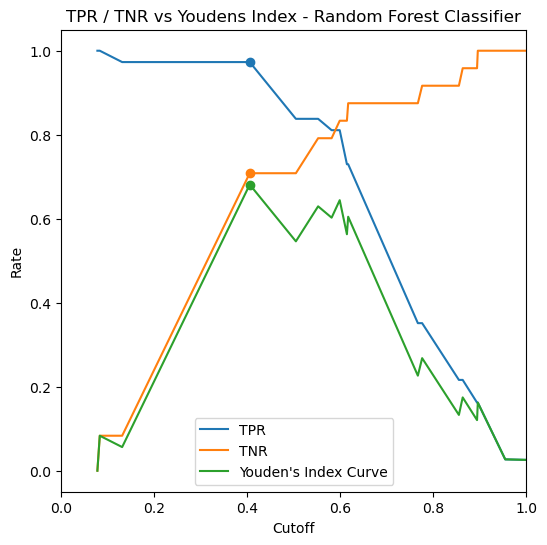

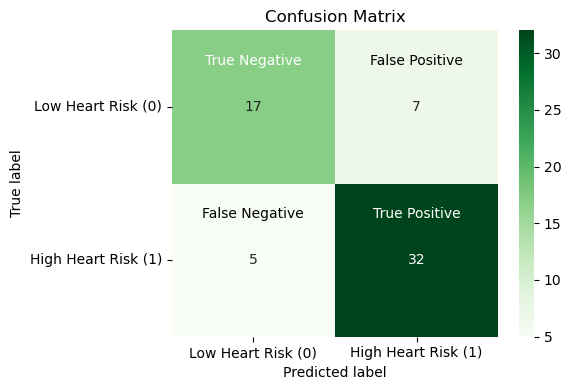

In [31]:
rfc_model_name, rfc_pr_curve_plot, rfc_roc_curve_plot, rfc_tpr_tnr_plot, rfc_conf_matrix, rfc_conf_matrix_plot, rfc_results = analyze_classification_model.analyze_model(rfc_trained_model,
                              'Random Forest Classifier',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(rfc_model_name, rfc_pr_curve_plot, rfc_roc_curve_plot, rfc_tpr_tnr_plot, rfc_conf_matrix_plot, rfc_results, rfc_best_params)
results_frame = results_frame.append(rfc_results, ignore_index=True)

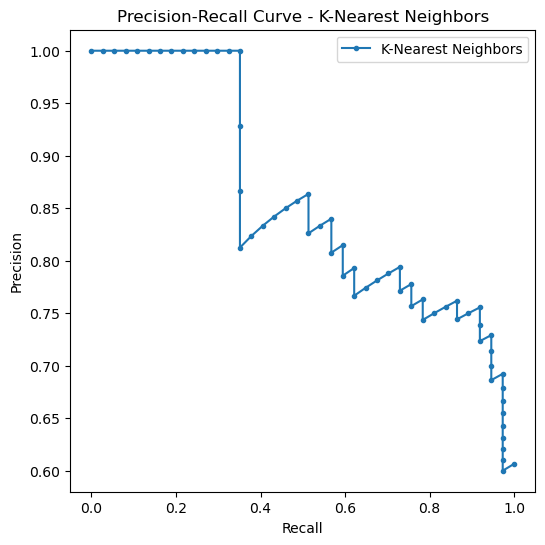

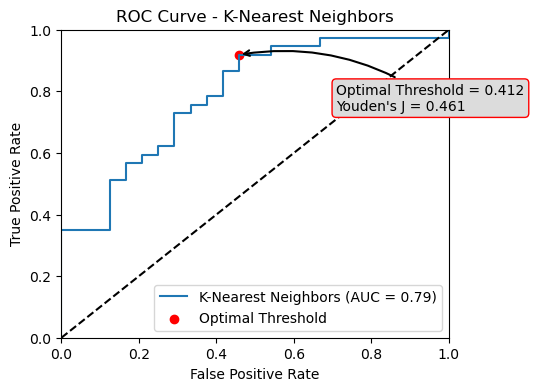

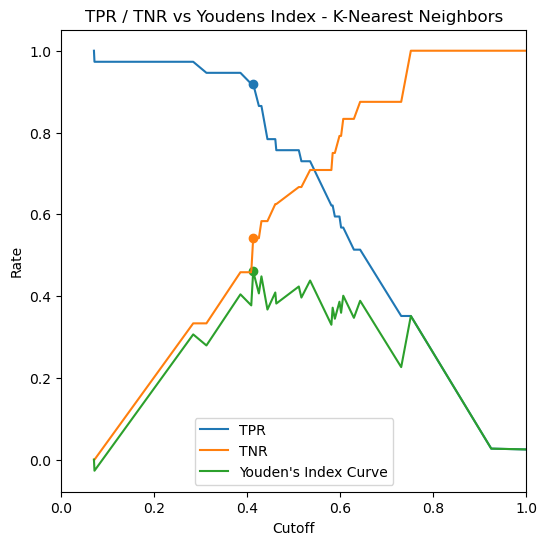

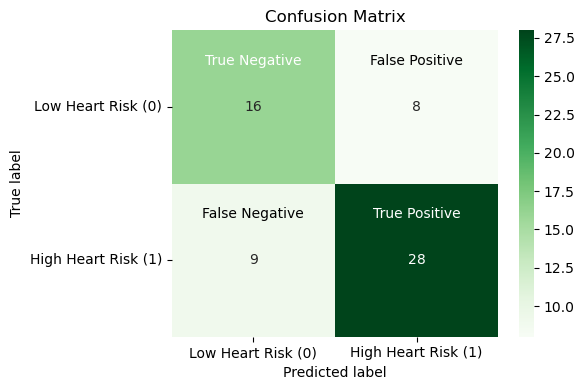

In [32]:
knn_model_name, knn_pr_curve_plot, knn_roc_curve_plot, knn_tpr_tnr_plot, knn_conf_matrix, knn_conf_matrix_plot, knn_results = analyze_classification_model.analyze_model(knn_trained_model,
                              'K-Nearest Neighbors',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(knn_model_name, knn_pr_curve_plot, knn_roc_curve_plot, knn_tpr_tnr_plot, knn_conf_matrix_plot, knn_results, knn_best_params)
results_frame = results_frame.append(knn_results, ignore_index=True)

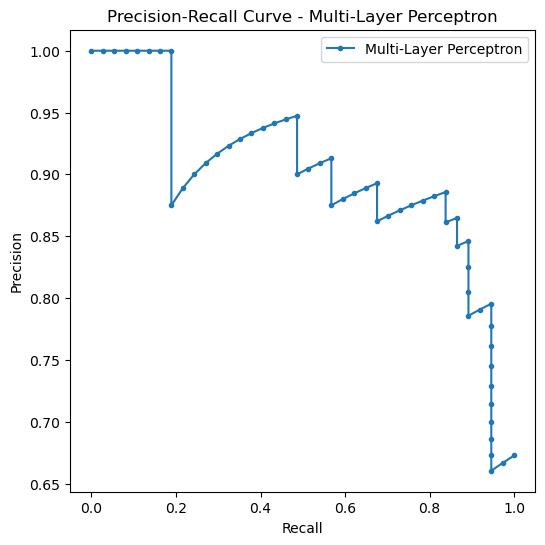

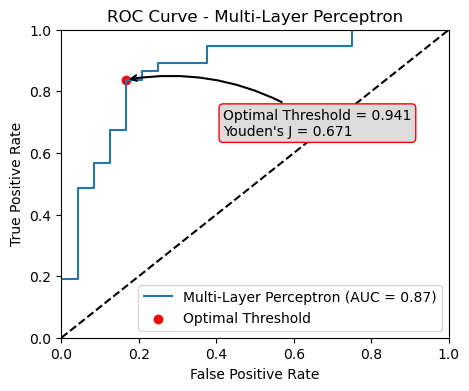

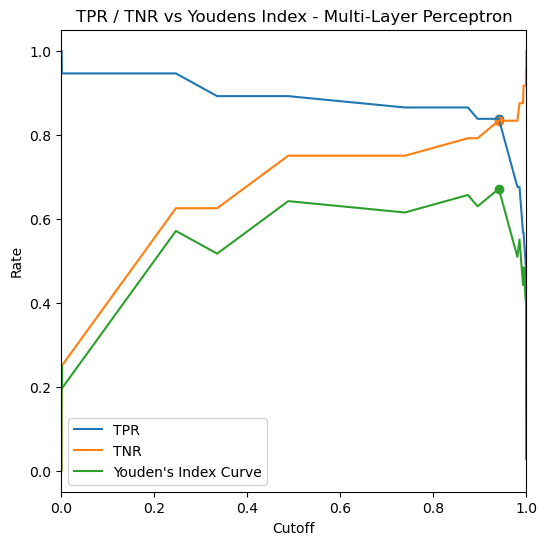

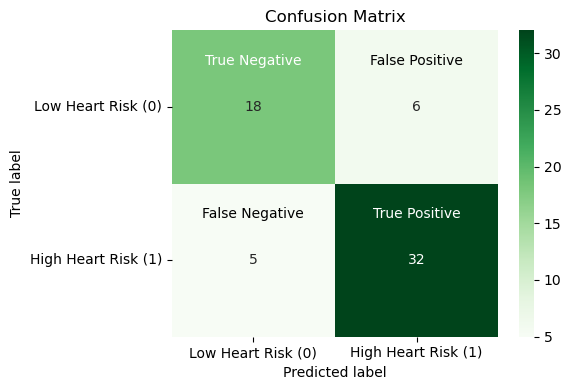

In [33]:
mlp_model_name, mlp_pr_curve_plot, mlp_roc_curve_plot, mlp_tpr_tnr_plot, mlp_conf_matrix, mlp_conf_matrix_plot, mlp_results = analyze_classification_model.analyze_model(mlp_trained_model,
                              'Multi-Layer Perceptron',
                              class_names,
                              datasets,
                              "Full")
def list_to_paragraph(value_list):
    style = getSampleStyleSheet()["BodyText"]
    return [Paragraph(str(value), style) for value in value_list]

results_frame = results_frame.append(mlp_results, ignore_index=True)

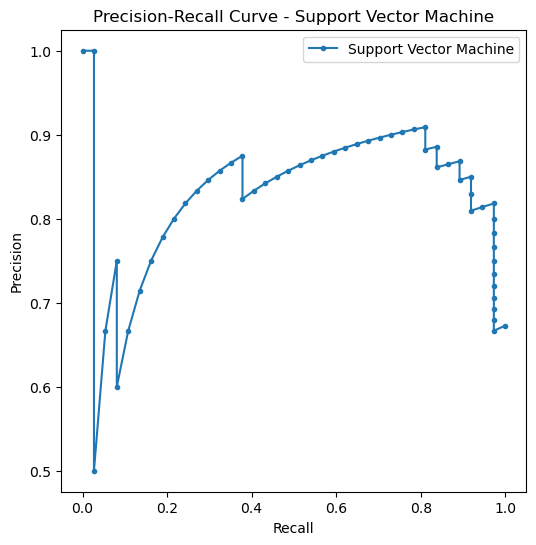

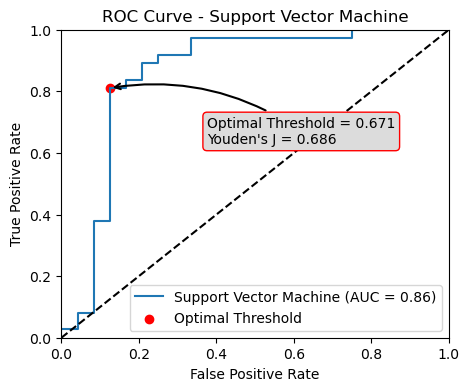

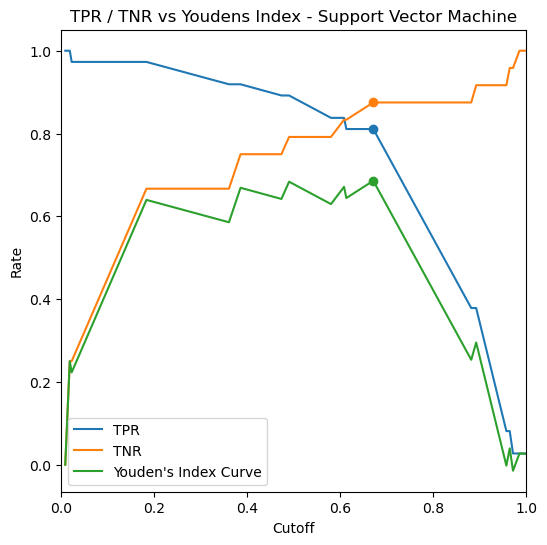

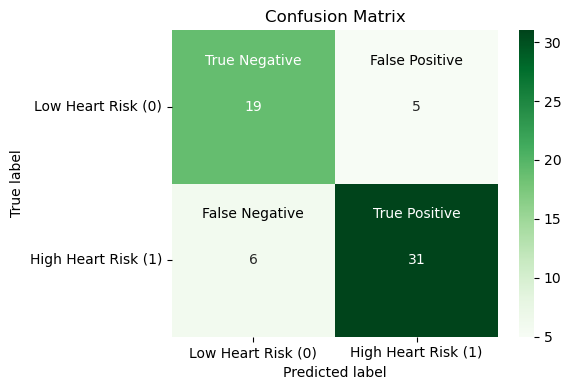

In [34]:
svm_model_name, svm_pr_curve_plot, svm_roc_curve_plot, svm_tpr_tnr_plot, svm_conf_matrix, svm_conf_matrix_plot, svm_results = analyze_classification_model.analyze_model(svm_trained_model,
                              'Support Vector Machine',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(svm_model_name, svm_pr_curve_plot, svm_roc_curve_plot, svm_tpr_tnr_plot, svm_conf_matrix_plot, svm_results, svm_best_params)
results_frame = results_frame.append(svm_results, ignore_index=True)

<h3> Gradient Boost Results </h3>

Based on the confusion matrix, the gradient boost classifier correctly predicted 17 true negatives and 32 true positives, while misclassifying 5 false negatives and 7 false positives. This resulted in an accuracy score of 0.803279, indicating that the model correctly classified 80.3% of the total observations.

The precision score of 0.820513 indicates that out of all the positive predictions made by the model, 82.05% were actually true positives. The recall score of 0.864865 indicates that the model correctly identified 86.49% of all actual positives. The F1 score of 0.842105, which is the harmonic mean of precision and recall, suggests that the model achieved a good balance between these two metrics.

The Youden J statistic of 0.654279 indicates that the model has a good balance between the true positive rate and the false positive rate. The optimal probability threshold of 0.248343 suggests that a lower threshold should be used to increase the sensitivity of the model. Overall, the gradient boost classifier performs reasonably well with a balanced precision and recall score, and can be used for further analysis and prediction.

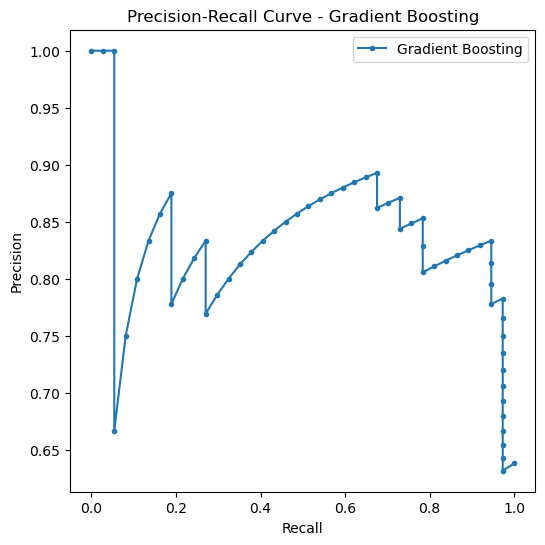

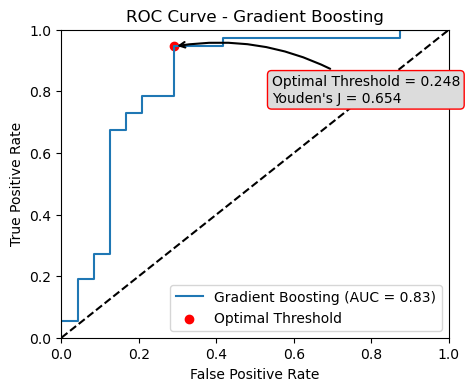

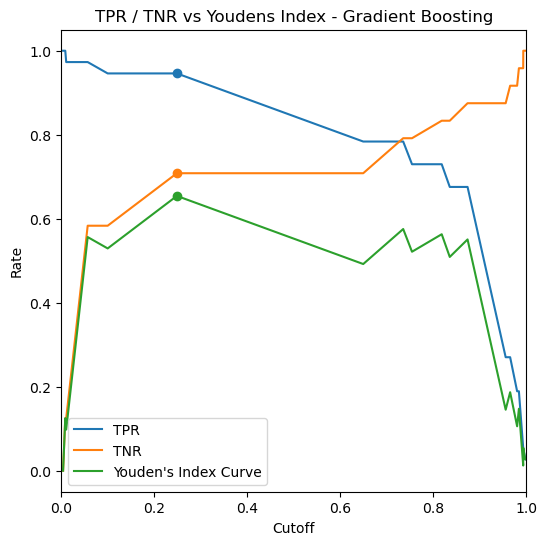

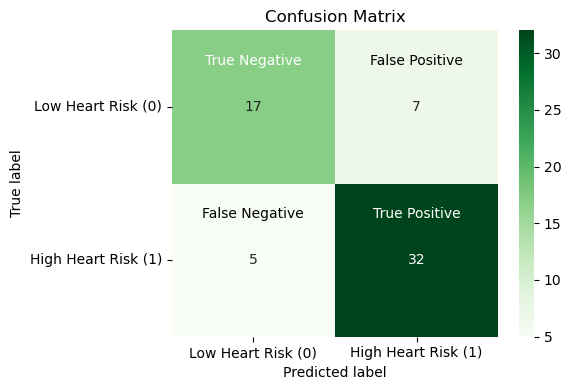

In [35]:
gbm_model_name, gbm_pr_curve_plot, gbm_roc_curve_plot, gbm_tpr_tnr_plot, gbm_conf_matrix, gbm_conf_matrix_plot, gbm_results = analyze_classification_model.analyze_model(gbm_trained_model,
                              'Gradient Boosting',
                              class_names,
                              datasets,
                              "full")

model_pdf_report.save_model_results_to_pdf(gbm_model_name, gbm_pr_curve_plot, gbm_roc_curve_plot, gbm_tpr_tnr_plot, gbm_conf_matrix_plot, gbm_results, gbm_best_params)
results_frame = results_frame.append(gbm_results, ignore_index=True)

<h2> Section 6: Analysis Summary </h2>

The table presents the performance of eight different binary classification models. Among the models, Logistic Regression performs the best in terms of Accuracy, Precision, Recall, F1 Score, and Youden J Stat. It has an accuracy of 86.89%, precision of 89.19%, recall of 89.19%, and F1 score of 89.19%. The Youden J Stat, which is a combined measure of sensitivity (recall) and specificity, is 76.69% for the Logistic Regression model. The second-best model in terms of these performance metrics is the Support Vector Machine, which has an accuracy of 81.97%, precision of 86.11%, recall of 83.78%, F1 score of 84.93%, and a Youden J Stat of 68.58%.

Looking closely at the performance of the best model, Logistic Regression, the confusion matrix shows that it correctly classified 20 true negative and 33 true positive instances, with 4 false positives and 4 false negatives. This demonstrates a good balance between specificity (83.33%) and sensitivity (89.19%), which is important for a reliable binary classification model. The optimal probability threshold for this model is 0.52, which is close to the standard threshold of 0.5, indicating that the model's default decision boundary is already well-calibrated. Overall, the Logistic Regression model's high accuracy, precision, recall, and F1 score demonstrate its efficacy in handling this binary classification task and make it the most suitable choice among the tested models.

In [36]:
results_frame

,Model Name,Confusion Matrix,Accuracy,Precision,Recall,Specificity,F1 Score,Youden J Stat,Optimal P Threshold
0,Logistic Regression,"[[20, 4], [4, 33]]",0.868852,0.891892,0.891892,0.833333,0.891892,0.766892,0.520191
1,AdaBoost Classifier,"[[17, 7], [6, 31]]",0.786885,0.815789,0.837838,0.708333,0.826667,0.602477,0.520231
2,Decision Tree Classifier,"[[19, 5], [15, 22]]",0.672131,0.814815,0.594595,0.791667,0.687500,0.573198,0.351978
3,Random Forest Classifier,"[[17, 7], [5, 32]]",0.803279,0.820513,0.864865,0.708333,0.842105,0.681306,0.405020
4,K-Nearest Neighbors,"[[16, 8], [9, 28]]",0.721311,0.777778,0.756757,0.666667,0.767123,0.460586,0.412430
5,Multi-Layer Perceptron,"[[18, 6], [5, 32]]",0.819672,0.842105,0.864865,0.750000,0.853333,0.671171,0.940643
6,Support Vector Machine,"[[19, 5], [6, 31]]",0.819672,0.861111,0.837838,0.791667,0.849315,0.685811,0.670729
7,Gradient Boosting,"[[17, 7], [5, 32]]",0.803279,0.820513,0.864865,0.708333,0.842105,0.654279,0.248343
